# SETUP

In [2]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2 # type: ignore
from cv2 import imread, imshow, waitKey
import matplotlib.pyplot as plt 
import numpy as np
import math


In [5]:
def display_image_rgb(image, title="Image to display", size=5):
    """
    Display an image using Matplotlib after converting it from BGR to RGB.
    
    Args:
    image: Image object (numpy array) loaded via OpenCV.
    title (str): Title for the image display.
    size (int): Base size for the display.
    
    Returns:
    None
    """
    if isinstance(image, str):
        img = cv2.imread(image)
    else:
        img = image

    width, height = img.shape[0], img.shape[1]
    aspect_ratio = width / height
    plt.figure(figsize=(size * aspect_ratio, size))
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

def display_image_bgr(image, title="Image to display", size=5):
    """
    Display an image in BGR format using Matplotlib (without converting it to RGB).
    
    Args:
    image: Image object (numpy array) loaded via OpenCV.
    title (str): Title for the image display.
    size (int): Base size for the display.
    
    Returns:
    None
    """
    img = cv2.imread(image)

    width, height = img.shape[0], img.shape[1]
    aspect_ratio = width / height
    plt.figure(figsize=(size * aspect_ratio, size))
    
    plt.imshow(img)
    plt.title(title)
    plt.show()

def display_dynamic_images(images, titles):
    num_images = len(images)
    max_cols = 3 
    num_rows = (num_images + max_cols - 1) // max_cols  
    
    plt.figure(figsize=(15, 5 * num_rows))
    
    for i in range(num_images):
        plt.subplot(num_rows, max_cols, i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))  
        plt.title(titles[i])
    
    plt.tight_layout()
    plt.show()


# IMAGE MATCHING

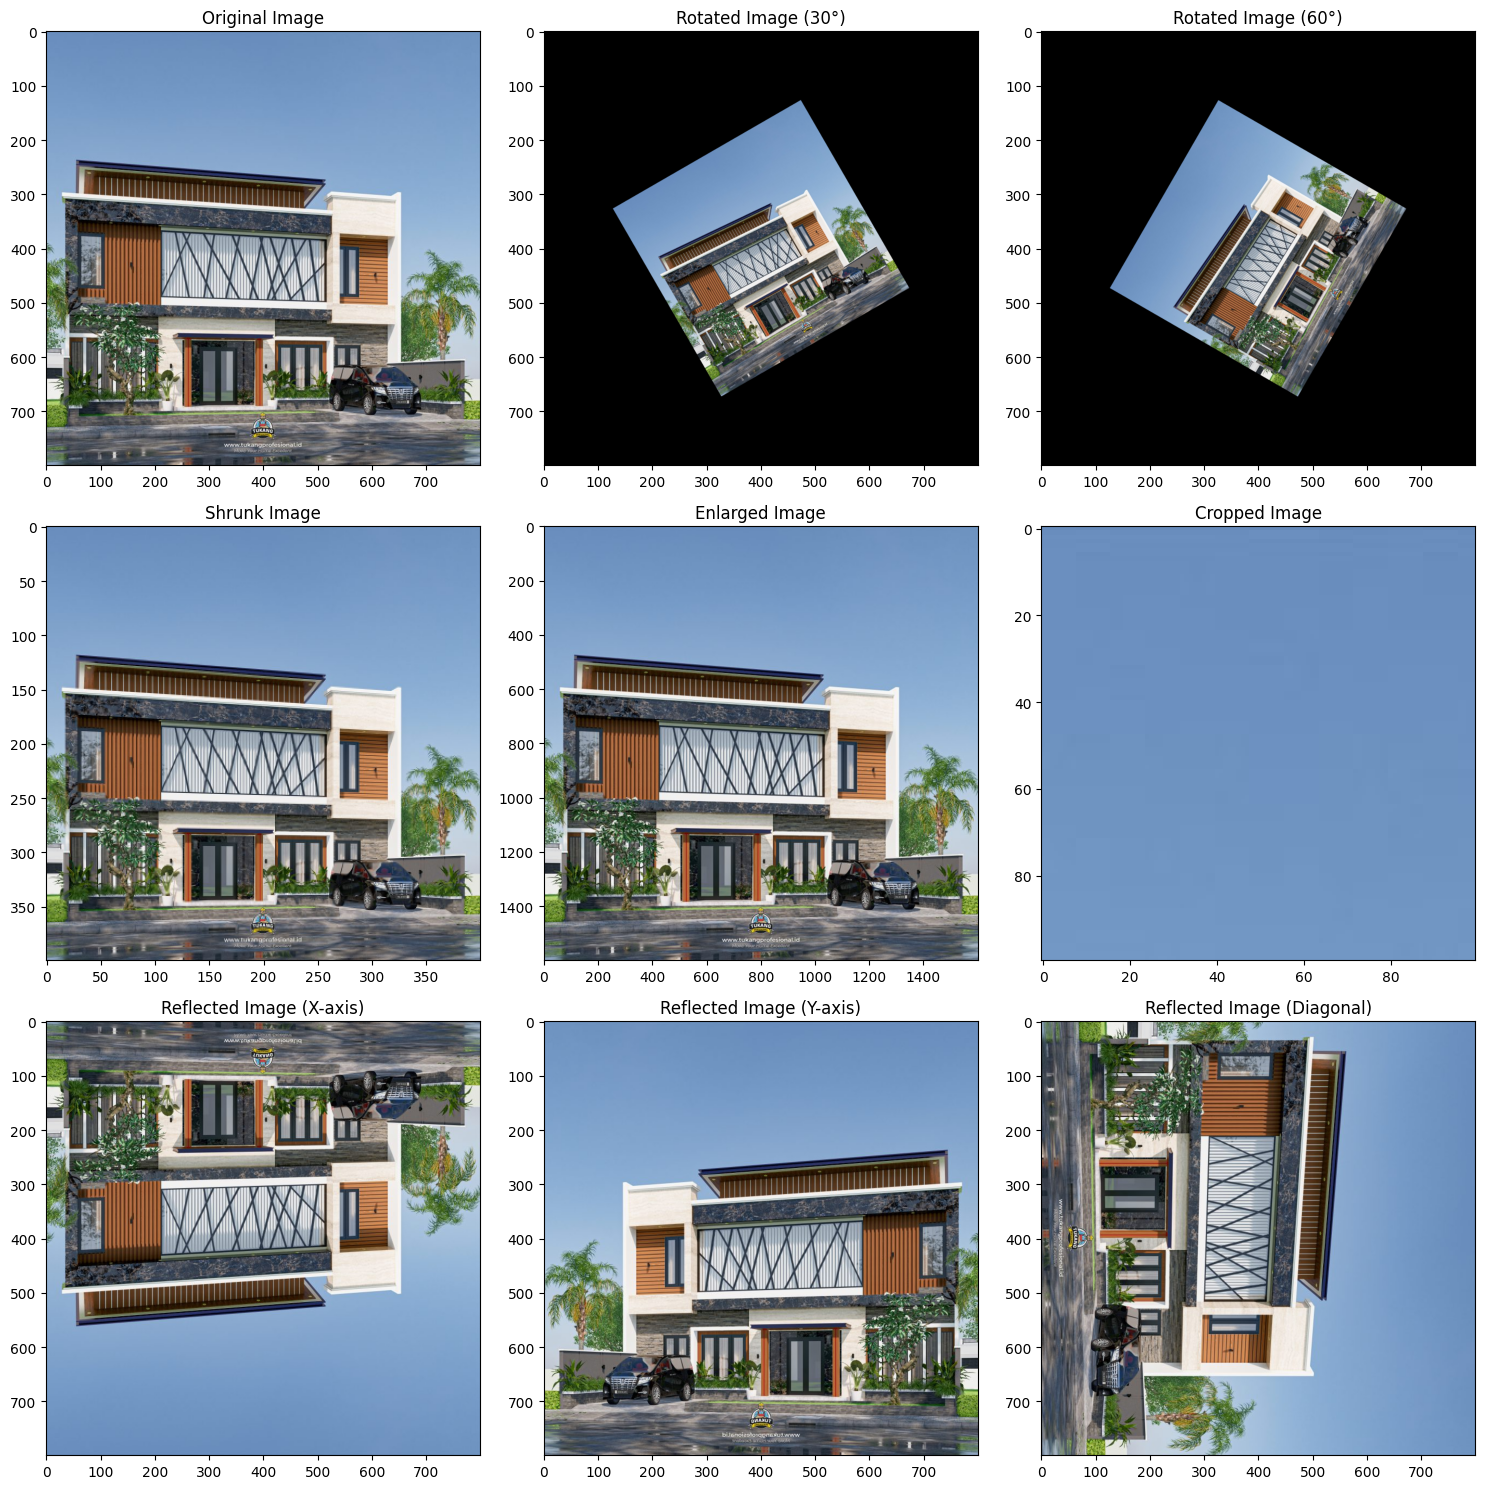

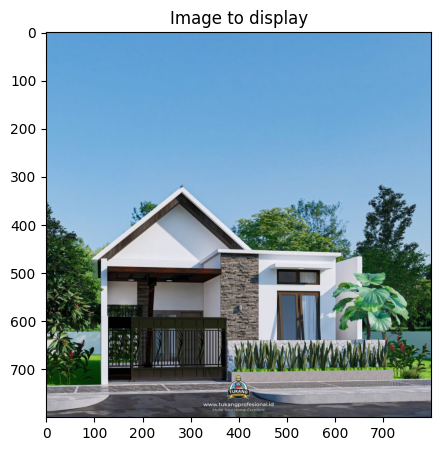

Matching Confidence for Original Image: 0.2174183577299118
Matching Confidence for Rotated Image (30°): 0.12825383245944977
Matching Confidence for Rotated Image (60°): 0.134816512465477
Matching Confidence for Shrunk Image: 0.3068907558917999
Matching Confidence for Enlarged Image: 0.38810914754867554
Matching Confidence for Cropped Image: 0.8881312608718872


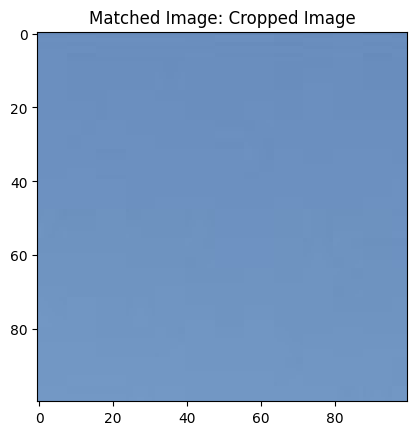

Matching Confidence for Reflected Image (X-axis): -0.191717267036438
Matching Confidence for Reflected Image (Y-axis): 0.2111472636461258
Matching Confidence for Reflected Image (Diagonal): -0.04804190248250961


In [6]:

img = cv2.imread('house.jpg')
template = cv2.imread('template.jpg')

template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

rows, cols = img.shape[:2]

# Rotation
M_rotation_30 = cv2.getRotationMatrix2D((cols / 2, rows / 2), 30, 0.5)
M_rotation_60 = cv2.getRotationMatrix2D((cols / 2, rows / 2), 60, 0.5)
img_rotated_30 = cv2.warpAffine(img, M_rotation_30, (cols, rows))
img_rotated_60 = cv2.warpAffine(img, M_rotation_60, (cols, rows))

# Shrinking and Enlarging
img_shrinked = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
img_enlarged = cv2.resize(img, None, fx=2, fy=2,  interpolation = cv2.INTER_CUBIC)

# Cropped
cropped_img = img[0:100, 0:100]

# Reflection/Mirroring
reflected_x = cv2.flip(img, 0)  
reflected_y = cv2.flip(img, 1) 

# Mirror diagonally (swap x and y)
reflected_diagonal = cv2.transpose(img)
reflected_diagonal = cv2.flip(reflected_diagonal, 1) 


# List of images and corresponding titles
images = [
    img,
    img_rotated_30,
    img_rotated_60,
    img_shrinked,
    img_enlarged,
    cropped_img,
    reflected_x,
    reflected_y,
    reflected_diagonal
]
titles = [
    "Original Image",
    "Rotated Image (30°)",
    "Rotated Image (60°)",
    "Shrunk Image",
    "Enlarged Image",
    "Cropped Image",
    "Reflected Image (X-axis)",
    "Reflected Image (Y-axis)",
    "Reflected Image (Diagonal)"
]

display_dynamic_images(images, titles)
display_image_rgb(template)


h, w = template.shape[:2]

for i, image in enumerate(images):
    result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    print(f"Matching Confidence for {titles[i]}: {max_val}")

    matched_image = image.copy()
    cv2.rectangle(matched_image, top_left, bottom_right, (255, 0, 0), 2)
    
    center_point = (top_left[0] + w // 2, top_left[1] + h // 2)
    cv2.circle(matched_image, center_point, 5, (0, 255, 0), -1) 

    if max_val > 0.8:  
        plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Matched Image: {titles[i]}")
        plt.show()